### 1. Importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### 2. Loading data & dataset preview

In [2]:
df = pd.read_csv('./dataset/WELFake_dataset.csv')

In [3]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [4]:
len(df)

72134

Checking if data has Nan or null values

In [5]:
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

Checking dataset balance

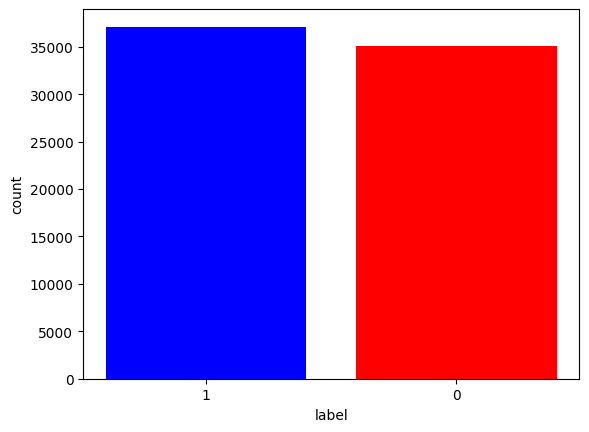

In [6]:

label_1,label_0 = df['label'].value_counts()
plt.bar(('1','0'),df['label'].value_counts(),color=['blue','red'])
plt.xlabel('label')
plt.ylabel('count')
plt.show()


### 3. Dataset preprocessing

Removing rows with NaN values, null values, empty strings

In [7]:
df = df.replace(['^\s+$'], np.nan, regex = True)
df = df.dropna()
df.reset_index(drop= True,inplace=True)
len(df)

70793

Removing unwanted columns

In [8]:
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
5,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
6,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
7,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1
8,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1
9,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,0


Cleaning data

In [9]:
def clean_data(data):
	data['text'] = data['text'].str.lower()
	data['title'] = data['title'].str.lower()
	data['text'] = data['text'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
	data['title'] = data['title'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
	data['text'] = data['text'].str.replace(r'\w*\d\w*','')
	data['title'] = data['title'].str.replace(r'\w*\d\w*','')
	df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
	df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)

In [10]:
clean_data(df)
df.head(10)

C:\Users\matij\AppData\Local\Temp\ipykernel_8032\1626204862.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(r'\w*\d\w*','')
C:\Users\matij\AppData\Local\Temp\ipykernel_8032\1626204862.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['title'] = data['title'].str.replace(r'\w*\d\w*','')


,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...,1
2,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
3,satan russia unvelis an image of its terrifyi...,the sarmat missile dubbed satan will replace...,1
4,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1
5,dr ben carson targeted by the irs i never had ...,dr ben carson tells the story of what happened...,1
6,sports bar owner bans nfl gameswill show only ...,the owner of the ringling bar located south of...,1
7,latest pipeline leak underscores dangers of da...,file in this sept file photo the marker tha...,1
8,gop senator just smacked down the most puncha...,the most punchable altright nazi on the intern...,1
9,may brexit offer would hurt cost eu citizens ...,brussels reuters british prime minister there...,0


splitting dataset

In [11]:
labels = df['label']
titles = df['title']
texts = df['text']

lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

Lemmatization

In [12]:
for x in range(len(texts)) :
    corpus = []
    review = texts[x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    texts[x] = review

C:\Users\matij\AppData\Local\Temp\ipykernel_8032\3608071613.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts[x] = review


In [13]:
texts[0]

'comment expected barack obama member fukyoflag blacklivesmatter movement called lynching hanging white people cop encouraged others radio show tuesday night turn tide kill white people cop send message killing black people americaone fyoflag organizer called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot lolatwhitefear twitter page pm show urging supporter call tonight continue dismantle illusion white snapshot twitter radio call invite radio show aired pm eastern standard timeduring show caller clearly call lynching killing white peoplea minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threat result interrupting conference callsan unidentified black man said mother fkers start fing like u bunch niers takin one u roll said cause already roll gang anyway six seven black mother fckers see white person lynch as let turn table conspired cop started losing people state emergency specula

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(texts, labels, test_size=0.3, random_state=0)

In [15]:
X_train

48203    dubai reuters saudi riyal fell u dollar forwar...
11950    bangkok reuters roadside bomb planted suspecte...
8813     dublin reuters ireland ready allow talk britai...
52253    washington reuters u investigator wiretapped f...
58323    brussels reuters britain ruling conservative b...
                               ...                        
21243    donald trump taken threat north korea twitter ...
45891    share twitter republican national committee la...
42613    missing california mother found safe thanksgiv...
43567    health care executive cheated medicare million...
68268    mexico city reuters mexican military helicopte...
Name: text, Length: 49555, dtype: object

In [16]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [17]:
print(tfidf_X_train[1].shape)
print(X_train.shape)
print(tfidf_X_train[1,215529])


(1, 253185)
(49555,)
0.14798603946205485


In [18]:
clf = LogisticRegression(random_state=0, penalty='none').fit(tfidf_X_train, Y_train)
Y_pred = clf.predict(tfidf_X_test)
confusion_matrix(Y_test,Y_pred)

C:\Users\matij\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[10282,   398],
       [  475, 10083]], dtype=int64)

In [19]:
accuracy_score(Y_test,Y_pred)

0.9588944345041907

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors=100).fit(tfidf_X_train, Y_train)
Y_pred = knn_clf.predict(tfidf_X_test)
accuracy_score(Y_test,Y_pred)

0.5056031641397495

In [27]:
ks = [5,10,15,20]
knn_accuracy = []

for k in ks:
	knn_clf = KNeighborsClassifier(n_neighbors=k).fit(tfidf_X_train, Y_train)
	Y_pred = knn_clf.predict(tfidf_X_test)
	knn_accuracy.append(accuracy_score(Y_test,Y_pred)*100)
plt.plot([5,10,15,20],knn_accuracy)
plt.xlabel('k predictors')
plt.ylabel('accuracy [%]')
plt.show()

KeyboardInterrupt: 

In [ ]:
clf = SVC(gamma='auto',kernel='linear')
clf.fit(tfidf_X_train, Y_train)
Y_pred = clf.predict(tfidf_X_test)
confusion_matrix(Y_test,Y_pred)
